In [1]:
import logging
import random
from copy import copy
from collections import namedtuple
from matplotlib import pyplot as plt

## Problem instances generator

In [2]:
def problem(N, seed=42):
    """Creates an instance of the problem"""

    random.seed(seed)
    return [
        list(set(random.randint(0, N - 1) for n in range(random.randint(N // 5, N // 2))))
        for n in range(random.randint(N, N * 5))
    ]

## Genetic Algorithm

In [3]:
N = 5
all_lists = problem(N)

PROBLEM_SIZE = len(all_lists)
POPULATION_SIZE = N
OFFSPRING_SIZE = int(3/5 * POPULATION_SIZE)

NUM_GENERATIONS = POPULATION_SIZE * 100

GOAL = set(range(N))

In [4]:
def flatten(l):
    return [item for sublist in l for item in sublist]

def fitness(genome, all_lists):
    x = list()
    for i, g in enumerate(genome):
        x.append(g * all_lists[i])
    return(1 - int(set(flatten(x)) == GOAL), sum(len(_) for _ in x))

def tournament(population, tournament_size=2):
    return max(random.choices(population, k=tournament_size), key=lambda i: i.fitness)

def cross_over(g1, g2):
    cut = random.randint(0, PROBLEM_SIZE)
    return g1[:cut] + g2[cut:]

def mutation(g):
    point = random.randint(0, PROBLEM_SIZE - 1)
    return g[:point] + (1 - g[point],) + g[point + 1 :] 

def print_sol(genome, all_lists):
    sol = list()
    for i, g in enumerate(genome):
        sol.append(g * all_lists[i])
    return [s for s in sol if s != []]

## Initial Population

In [5]:
population = list()
Individual = namedtuple("Individual", ["genome", "fitness"])

for genome in [tuple([random.choice([1, 0]) for _ in range(PROBLEM_SIZE)]) for _ in range(POPULATION_SIZE)]:
    population.append(Individual(genome, fitness(genome, all_lists)))

for p in population:
    print(p)

Individual(genome=(1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0), fitness=(0, 15))
Individual(genome=(0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1), fitness=(0, 17))
Individual(genome=(1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1), fitness=(0, 16))
Individual(genome=(1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1), fitness=(0, 19))
Individual(genome=(1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0), fitness=(0, 20))


## Evolution

In [6]:
fitness_log = [(0, i.fitness) for i in population]
best_res_log = [(0,(sorted(population, key = lambda i: i.fitness)[0])[1])]

for g in range(NUM_GENERATIONS):
    offspring = list()
    for i in range(OFFSPRING_SIZE):
        
        if random.random() < 0.3:
            p = tournament(population)
            o = mutation(p.genome)
            #o = mutation(o)
        else:
            p1 = tournament(population)
            p2 = tournament(population)
            o = cross_over(p1.genome, p2.genome)

        f = fitness(o, all_lists)
        fitness_log.append((g + 1, f))
        offspring.append(Individual(o, f))
    population += offspring
    population = sorted(population, key = lambda i: i.fitness)[:POPULATION_SIZE]
    best_res_log.append((g+1, population[0][1]))  
    if population[0][1] == (0, POPULATION_SIZE):
        break

w = population[0][1][1]
print("N =", N, "| w =", w, " | num.gen. =", g)

N = 5 | w = 5  | num.gen. = 94


In [7]:
for p in population:
    print(print_sol(p.genome, all_lists), p.fitness)

[[2, 4], [3], [0], [1]] (0, 5)
[[4], [2, 4], [3], [0], [1]] (0, 6)
[[4], [2, 4], [3], [0], [1]] (0, 6)
[[4], [2, 4], [3], [0], [1]] (0, 6)
[[4], [2, 4], [3], [0], [1]] (0, 6)


### Plotting results for N = 5

In [8]:
fitness_log_plot = [(f[0], f[1][1]) for f in fitness_log]
fitness_log_red = [(f[0], f[1][0]*f[1][1]) for f in fitness_log]
fitness_log_red = [f for f in fitness_log_red if f[1] != 0]
best_res_log_plot = [(f[0], f[1][1]) for f in best_res_log]

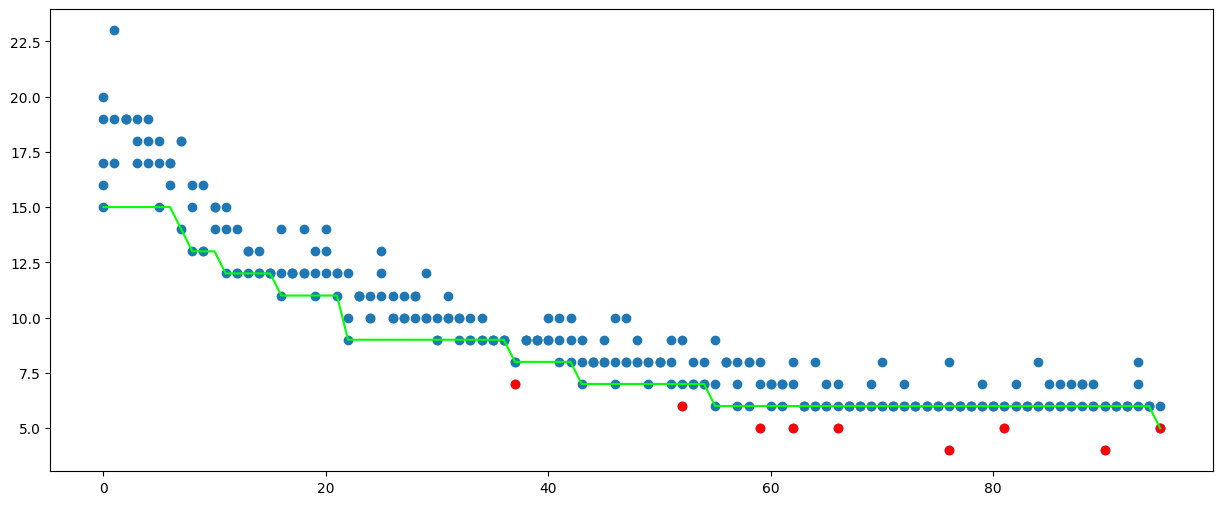

In [9]:
plt.figure(figsize=(15, 6))
plt.scatter([x[0] for x in fitness_log_plot], [y[1] for y in fitness_log_plot])
plt.scatter([x[0] for x in fitness_log_red], [y[1] for y in fitness_log_red], color='red')
plt.plot([x[0] for x in best_res_log_plot], [y[1] for y in best_res_log_plot], color='lime')
plt.show()

In [10]:
def ga(N):
    
    def flatten(l):
        return [item for sublist in l for item in sublist]

    def fitness(genome, all_lists):
        x = list()
        for i, g in enumerate(genome):
            x.append(g * all_lists[i])
        return(1 - int(set(flatten(x)) == GOAL), sum(len(_) for _ in x))

    def tournament(population, tournament_size=2):
        return max(random.choices(population, k=tournament_size), key=lambda i: i.fitness)

    def cross_over(g1, g2):
        cut = random.randint(0, PROBLEM_SIZE)
        return g1[:cut] + g2[cut:]

    def mutation(g):
        point = random.randint(0, PROBLEM_SIZE - 1)
        return g[:point] + (1 - g[point],) + g[point + 1 :] 
    
    import time
    start_time = time.time()


    all_lists = problem(N)

    PROBLEM_SIZE = len(all_lists)
    POPULATION_SIZE = N
    OFFSPRING_SIZE = int(3/5 * POPULATION_SIZE)

    NUM_GENERATIONS = POPULATION_SIZE * 1000

    GOAL = set(range(N))


    population = list()
    Individual = namedtuple("Individual", ["genome", "fitness"])

    for genome in [tuple([random.choice([1, 0]) for _ in range(PROBLEM_SIZE)]) for _ in range(POPULATION_SIZE)]:
        population.append(Individual(genome, fitness(genome, all_lists)))
    

    fitness_log = [(0, i.fitness) for i in population]
    best_res_log = [(0,(sorted(population, key = lambda i: i.fitness)[0])[1])]

    for g in range(NUM_GENERATIONS):
        offspring = list()
        for i in range(OFFSPRING_SIZE):
            
            if random.random() < 0.3:
                p = tournament(population)
                o = mutation(p.genome)
                #o = mutation(o)
            else:
                p1 = tournament(population)
                p2 = tournament(population)
                o = cross_over(p1.genome, p2.genome)

            f = fitness(o, all_lists)
            fitness_log.append((g + 1, f))
            offspring.append(Individual(o, f))
        population += offspring
        population = sorted(population, key = lambda i: i.fitness)[:POPULATION_SIZE]
        best_res_log.append((g+1, population[0][1]))  
        if population[0][1] == (0, POPULATION_SIZE):
            break
        end_time = time.time()

        if end_time - start_time > 600:
            break


        print (round(100*g/NUM_GENERATIONS, 3), " %", " time: ", round(end_time - start_time, 1), " s\t", sep='', end="\r")
        

    w = population[0][1][1]
    print("N =", N, "| w =", w, " | num.gen. =", g)
    

In [11]:
for N in [5, 10, 20, 100, 500, 1000]:
    ga(N)

N = 5 | w = 5  | num.gen. = 94
N = 10 | w = 14  | num.gen. = 9999
N = 20 | w = 35  | num.gen. = 19999
N = 100 | w = 224  | num.gen. = 77172	 s	
N = 500 | w = 85804  | num.gen. = 155
N = 1000 | w = 501815  | num.gen. = 8
